# MovieLens dataset

In [1]:
# 3 tables (.dat files)
# ratings, users and movies

import pandas as pd
import numpy as np

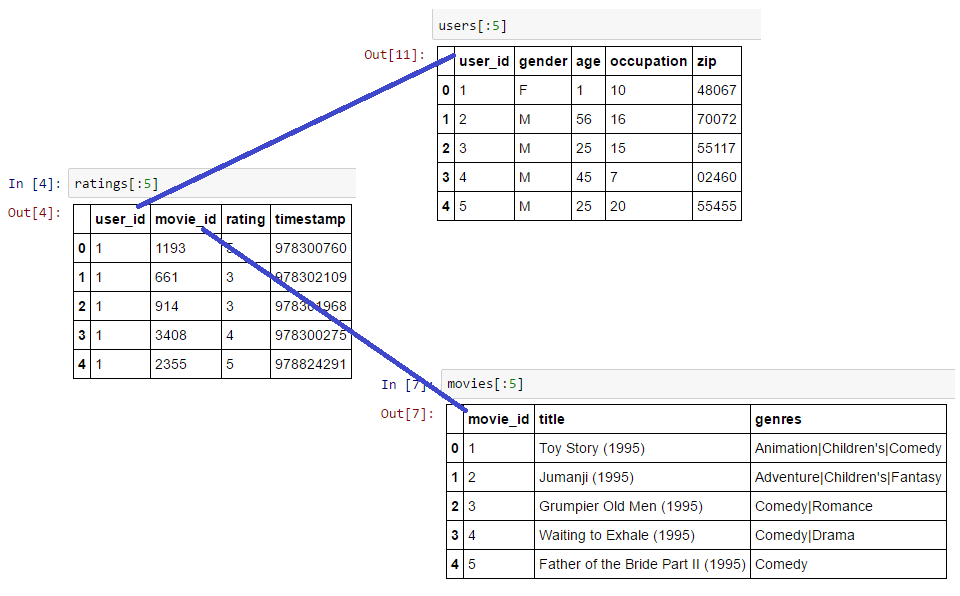

In [2]:
from IPython.display import Image

PATH = "C:\\datasets\\MovieLens_1mil\\"
Image(filename = PATH + "ERD.png")
#Image(filename = PATH + "ERD.png", width=100, height=100)

# import tables into 3 seperate dataframes

In [3]:
# ratings
ratingsDF = pd.read_table("C:\\datasets\\MovieLens_1mil\\data\\ratings.dat",
                         sep = "::",
                         header = None,
                         names = ['UserID', 'MovieID', 'Rating', 'TimeStamp'],
                         engine = 'python')

In [4]:
ratingsDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
UserID       1000209 non-null int64
MovieID      1000209 non-null int64
Rating       1000209 non-null int64
TimeStamp    1000209 non-null int64
dtypes: int64(4)
memory usage: 30.5 MB


In [5]:
ratingsDF.shape

(1000209, 4)

In [6]:
ratingsDF.head()

# ratings are 1 to 5, with 5 being the best

,UserID,MovieID,Rating,TimeStamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [7]:
# movies
moviesDF = pd.read_table("C:\\datasets\\MovieLens_1mil\\data\\movies.dat",
                        sep = "::",
                        header = None,
                        names = ['MovieID', 'Title', 'Genres'],
                        engine = 'python')

In [8]:
moviesDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
MovieID    3883 non-null int64
Title      3883 non-null object
Genres     3883 non-null object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [9]:
moviesDF.shape

(3883, 3)

In [10]:
moviesDF.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [11]:
# users
usersDF = pd.read_table("C:\\datasets\\MovieLens_1mil\\data\\users.dat",
                       sep = "::",
                       header = None,
                       names = ['UserID', 'Gender', 'Age', 'Occupation', 'ZipCode'],
                       engine = 'python')

In [12]:
usersDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
UserID        6040 non-null int64
Gender        6040 non-null object
Age           6040 non-null int64
Occupation    6040 non-null int64
ZipCode       6040 non-null object
dtypes: int64(3), object(2)
memory usage: 236.0+ KB


In [13]:
usersDF.shape

(6040, 5)

In [14]:
usersDF.head()

# will map the AgeRange and Occupation to more meaningful values further down.

,UserID,Gender,Age,Occupation,ZipCode
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [15]:
# usersDF
# keep existing Age column but add new column; mapping Age to its associated AgeRange value

In [16]:
# 1:  "Under 18"
# 18:  "18-24"
# 25:  "25-34"
# 35:  "35-44"
# 45:  "45-49"
# 50:  "50-55"
# 56:  "56+"

def age_range (row):
    a = 0
    if row == 1:
        a = "Under 18"
    elif row == 18:
        a = "18-24"
    elif row == 25:
        a = "25-34"
    elif row == 35:
        a = "35-44"
    elif row == 45:
        a = "45-49"
    elif row == 50:
        a = "50-55"
    elif row == 56:
        a = "56+"
    return a
        

In [17]:
usersDF.head(1)

,UserID,Gender,Age,Occupation,ZipCode
0,1,F,1,10,48067


In [18]:
usersDF['AgeRange'] = usersDF.Age.apply(lambda row: age_range(row))

In [19]:
usersDF.head()

,UserID,Gender,Age,Occupation,ZipCode,AgeRange
0,1,F,1,10,48067,Under 18
1,2,M,56,16,70072,56+
2,3,M,25,15,55117,25-34
3,4,M,45,7,02460,45-49
4,5,M,25,20,55455,25-34


In [20]:
# map occupation code to the occupation name - overwriting the existing occupation code
def get_occupation_name(row):
    a = 0
    if row == 0:
        a = "other"
    elif row == 1:
        a = "academic/educator"
    elif row == 2:
        a = "artist"
    elif row == 3:
        a = "clerical/admin"
    elif row == 4:
        a = "college/grad student"
    elif row == 5:
        a = "customer service"
    elif row == 6:
        a = "doctor/health care"
    elif row == 7:
        a = "executive/managerial"
    elif row == 8:
        a = "farmer"
    elif row == 9:
        a = "homemaker"
    elif row == 10:
        a = "K-12 student"
    elif row == 11:
        a = "lawyer"
    elif row == 12:
        a = "programmer"
    elif row == 13:
        a = "retired"
    elif row == 14:
        a = "sales/marketing"
    elif row == 15:
        a = "scientist"
    elif row == 16:
        a = "self-employed"
    elif row == 17:
        a = "technician/engineer"
    elif row == 18:
        a = "tradesman/craftsman"
    elif row == 19:
        a = "unemployed"
    elif row == 20:
        a = "writer"
    return a
    

In [21]:
# usersDF['Occupation_Name'] = usersDF.Occupation.apply(lambda x: get_occupation_name(x)) # create new col
usersDF['Occupation'] = usersDF.Occupation.apply(lambda x: get_occupation_name(x)) # overwrite existing col

In [22]:
usersDF.head()

,UserID,Gender,Age,Occupation,ZipCode,AgeRange
0,1,F,1,K-12 student,48067,Under 18
1,2,M,56,self-employed,70072,56+
2,3,M,25,scientist,55117,25-34
3,4,M,45,executive/managerial,02460,45-49
4,5,M,25,writer,55455,25-34


In [23]:
moviesDF.Genres.unique()
# will need to split out combined genres for more meaningful analysis

array(["Animation|Children's|Comedy", "Adventure|Children's|Fantasy",
       'Comedy|Romance', 'Comedy|Drama', 'Comedy', 'Action|Crime|Thriller',
       "Adventure|Children's", 'Action', 'Action|Adventure|Thriller',
       'Comedy|Drama|Romance', 'Comedy|Horror', "Animation|Children's",
       'Drama', 'Action|Adventure|Romance', 'Drama|Thriller',
       'Drama|Romance', 'Thriller', 'Action|Comedy|Drama',
       'Crime|Drama|Thriller', 'Drama|Sci-Fi', 'Romance',
       'Adventure|Sci-Fi', 'Adventure|Romance', "Children's|Comedy|Drama",
       'Documentary', 'Drama|War', 'Action|Crime|Drama',
       'Action|Adventure', 'Crime|Thriller',
       "Animation|Children's|Musical|Romance", 'Action|Drama|Thriller',
       "Children's|Comedy", 'Drama|Mystery', 'Sci-Fi|Thriller',
       'Action|Comedy|Crime|Horror|Thriller', 'Drama|Musical',
       'Crime|Drama|Romance', 'Adventure|Drama', 'Action|Thriller',
       "Adventure|Children's|Comedy|Musical", 'Action|Drama|War',
       'Action|Adventur

In [24]:
ratingsDF.describe()

,UserID,MovieID,Rating,TimeStamp
count,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06
mean,3.024512e+03,1.865540e+03,3.581564e+00,9.722437e+08
std,1.728413e+03,1.096041e+03,1.117102e+00,1.215256e+07
min,1.000000e+00,1.000000e+00,1.000000e+00,9.567039e+08
25%,1.506000e+03,1.030000e+03,3.000000e+00,9.653026e+08
50%,3.070000e+03,1.835000e+03,4.000000e+00,9.730180e+08
75%,4.476000e+03,2.770000e+03,4.000000e+00,9.752209e+08
max,6.040000e+03,3.952000e+03,5.000000e+00,1.046455e+09


In [25]:
usersDF.describe()

,UserID,Age
count,6040.000000,6040.000000
mean,3020.500000,30.639238
std,1743.742145,12.895962
min,1.000000,1.000000
25%,1510.750000,25.000000
50%,3020.500000,25.000000
75%,4530.250000,35.000000
max,6040.000000,56.000000


In [26]:
moviesDF.describe()

,MovieID
count,3883.000000
mean,1986.049446
std,1146.778349
min,1.000000
25%,982.500000
50%,2010.000000
75%,2980.500000
max,3952.000000


In [27]:
# how many users in each occupation?
usersDF.groupby('Occupation').size().sort_values()

# the distribution makes sense - and marketing teams would focus on advertising to college/grad students 

Occupation
farmer                   17
tradesman/craftsman      70
unemployed               72
homemaker                92
customer service        112
lawyer                  129
retired                 142
scientist               144
clerical/admin          173
K-12 student            195
doctor/health care      236
self-employed           241
artist                  267
writer                  281
sales/marketing         302
programmer              388
technician/engineer     502
academic/educator       528
executive/managerial    679
other                   711
college/grad student    759
dtype: int64

In [28]:
# what is the average/mean age per occupation
usersDF.groupby('Occupation').Age.mean().sort_values
#usersDF.groupby(['Occupation', 'Gender']).Age.mean()

<bound method Series.sort_values of Occupation
K-12 student             4.107692
academic/educator       36.030303
artist                  30.662921
clerical/admin          33.127168
college/grad student    20.408432
customer service        29.508929
doctor/health care      36.855932
executive/managerial    34.811487
farmer                  34.529412
homemaker               33.989130
lawyer                  34.015504
other                   29.856540
programmer              29.716495
retired                 53.190141
sales/marketing         31.135762
scientist               31.312500
self-employed           37.792531
technician/engineer     32.181275
tradesman/craftsman     33.400000
unemployed              21.444444
writer                  31.024911
Name: Age, dtype: float64>

In [29]:
# split genres for better analysis - using dummy variables .get_dummies
moviesDF.head(1)


,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy


In [30]:
moviesDF = pd.concat([moviesDF, moviesDF.Genres.str.get_dummies(sep='|')], axis=1)


In [31]:
#moviesDF.head(5)
#moviesDF.columns[3:]
moviesDF.loc[0]

# behold the power of python pandas

MovieID                                  1
Title                     Toy Story (1995)
Genres         Animation|Children's|Comedy
Action                                   0
Adventure                                0
Animation                                1
Children's                               1
Comedy                                   1
Crime                                    0
Documentary                              0
Drama                                    0
Fantasy                                  0
Film-Noir                                0
Horror                                   0
Musical                                  0
Mystery                                  0
Romance                                  0
Sci-Fi                                   0
Thriller                                 0
War                                      0
Western                                  0
Name: 0, dtype: object

# combine/merge the 3 seperate dataframes into one dataframe

In [32]:
print(ratingsDF.head(1))
print('\n')
print(moviesDF.head(1))
print('\n')
print(usersDF.head(1))

   UserID  MovieID  Rating  TimeStamp
0       1     1193       5  978300760


   MovieID             Title                       Genres  Action  Adventure  \
0        1  Toy Story (1995)  Animation|Children's|Comedy       0          0   

   Animation  Children's  Comedy  Crime  Documentary   ...     Fantasy  \
0          1           1       1      0            0   ...           0   

   Film-Noir  Horror  Musical  Mystery  Romance  Sci-Fi  Thriller  War  \
0          0       0        0        0        0       0         0    0   

   Western  
0        0  

[1 rows x 21 columns]


   UserID Gender  Age    Occupation ZipCode  AgeRange
0       1      F    1  K-12 student   48067  Under 18


In [33]:
# columns with the same name will be joined without specifying them explicitly
# help(pd.merge)
movieLensMergedDF = pd.merge(pd.merge(ratingsDF, usersDF), moviesDF)
movieLensMergedDF.sort_values(['UserID','MovieID'])


,UserID,MovieID,Rating,TimeStamp,Gender,Age,Occupation,ZipCode,AgeRange,Title,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
41626,1,1,5,978824268,F,1,K-12 student,48067,Under 18,Toy Story (1995),...,0,0,0,0,0,0,0,0,0,0
28501,1,48,5,978824351,F,1,K-12 student,48067,Under 18,Pocahontas (1995),...,0,0,0,1,0,1,0,0,0,0
40375,1,150,5,978301777,F,1,K-12 student,48067,Under 18,Apollo 13 (1995),...,0,0,0,0,0,0,0,0,0,0
46757,1,260,4,978300760,F,1,K-12 student,48067,Under 18,Star Wars: Episode IV - A New Hope (1977),...,1,0,0,0,0,0,1,0,0,0
25853,1,527,5,978824195,F,1,K-12 student,48067,Under 18,Schindler's List (1993),...,0,0,0,0,0,0,0,0,1,0
54908,1,531,4,978302149,F,1,K-12 student,48067,Under 18,"Secret Garden, The (1993)",...,0,0,0,0,0,0,0,0,0,0
34973,1,588,4,978824268,F,1,K-12 student,48067,Under 18,Aladdin (1992),...,0,0,0,1,0,0,0,0,0,0
10278,1,594,4,978302268,F,1,K-12 student,48067,Under 18,Snow White and the Seven Dwarfs (1937),...,0,0,0,1,0,0,0,0,0,0
12759,1,595,5,978824268,F,1,K-12 student,48067,Under 18,Beauty and the Beast (1991),...,0,0,0,1,0,0,0,0,0,0
56831,1,608,4,978301398,F,1,K-12 student,48067,Under 18,Fargo (1996),...,0,0,0,0,0,0,0,1,0,0


In [34]:
print(ratingsDF.shape)
#print('\n')
print(usersDF.shape) # added AgeRange column
print(moviesDF.shape)
print(movieLensMergedDF.shape)
# 1000209 rows as expected (1,000,209 ratings)
# 29 columns after merging (ratingsDF + usersDF + (moviesDF + 18 genre split columns) )
#  = (4 + 6 + (3 + 18))
## when merged UserID and MovieID columns only appear once, therefore 
# 29 = (4 + 6 + (3 + 18)) - 2

(1000209, 4)
(6040, 6)
(3883, 21)
(1000209, 29)


In [35]:
movieLensMergedDF.loc[0]

UserID                                              1
MovieID                                          1193
Rating                                              5
TimeStamp                                   978300760
Gender                                              F
Age                                                 1
Occupation                               K-12 student
ZipCode                                         48067
AgeRange                                     Under 18
Title          One Flew Over the Cuckoo's Nest (1975)
Genres                                          Drama
Action                                              0
Adventure                                           0
Animation                                           0
Children's                                          0
Comedy                                              0
Crime                                               0
Documentary                                         0
Drama                       

In [36]:
# output movieLensMergedDF to csv file for cross checking results when needed

# movieLensMergedDF.to_csv(movieLensMergedDF, sep='\t', encoding='utf-8') # error
# movieLensMergedDF.to_csv('movieLensMergedDF.csv', sep=',') # works - only need to run once
# error: noticed the genres were split 3 times instead of just once giving 57 columns instead of 21, re-ran above and was ok

# More discovery analysis

In [37]:
# Top 20 rated movies
movieLensMergedDF.Title.value_counts()[:20]
# American Beauty rated 3428 times

American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Saving Private Ryan (1998)                               2653
Terminator 2: Judgment Day (1991)                        2649
Matrix, The (1999)                                       2590
Back to the Future (1985)                                2583
Silence of the Lambs, The (1991)                         2578
Men in Black (1997)                                      2538
Raiders of the Lost Ark (1981)                           2514
Fargo (1996)                                             2513
Sixth Sense, The (1999)                                  2459
Braveheart (1995)                                        2443
Shakespeare in Love (1998)                               2369
Princess

In [38]:
# which movies are most highly rated
#Dict {Value: key} 
RatingCountsMeanDF = movieLensMergedDF.groupby('Title').agg({'Rating': [np.size, np.mean]})
RatingCountsMeanDF.head(150)
# American Beauty (1999) 3428 ratings with a mean rating of 4.317386

Rating          
                                                 size      mean
Title                                                          
$1,000,000 Duck (1971)                             37  3.027027
'Night Mother (1986)                               70  3.371429
'Til There Was You (1997)                          52  2.692308
'burbs, The (1989)                                303  2.910891
...And Justice for All (1979)                     199  3.713568
1-900 (1994)                                        2  2.500000
10 Things I Hate About You (1999)                 700  3.422857
101 Dalmatians (1961)                             565  3.596460
101 Dalmatians (1996)                             364  3.046703
12 Angry Men (1957)                               616  4.295455
13th Warrior, The (1999)                          750  3.158667
187 (1997)                                         55  2.745455
2 Days in the Valley (1996)                       286  3.283217
20 Dates (1998)                                   139  2.856115
20,000 Leagues Under the Sea (1954)               575  3.702609
200 Cigarettes (1999)                             181  2.883978
2001: A Space Odyssey (1968)                     1716  4.068765
2010 (1984)                                       470  3.417021
24 7: Twenty Four Seven (1997)                      5  4.000000
24-hour Woman (1998)                                9  1.777778
28 Days (2000)                                    505  3.065347
3 Ninjas: High Noon On Mega Mountain (1998)        47  1.361702
3 Strikes (2000)                                    4  2.750000
301, 302 (1995)                                     9  2.888889
39 Steps, The (1935)                              253  4.075099
400 Blows, The (Les Quatre cents coups) (1959)    187  4.320856
42 Up (1998)                                       88  4.227273
52 Pick-Up (1986)                                 140  3.300000
54 (1998)                                         259  2.764479
7th Voyage of Sinbad, The (1958)                  258  3.616279
...                                               ...       ...
Almost Famous (2000)                              994  4.226358
Almost Heroes (1998)                               60  2.483333
Alphaville (1965)                                  64  3.359375
Alvarez Kelly (1966)                               28  3.321429
Amadeus (1984)                                   1382  4.251809
Amateur (1994)                                     47  3.787234
Amazing Panda Adventure, The (1995)                18  2.888889
American Beauty (1999)                           3428  4.317386
American Buffalo (1996)                            60  3.166667
American Dream (1990)                              36  3.722222
American Flyers (1985)                             97  3.329897
American Gigolo (1980)                            295  3.169492
American Graffiti (1973)                          990  4.026263
American History X (1998)                         640  4.226562
American Movie (1999)                             295  4.013559
American Pie (1999)                              1389  3.709863
American Pimp (1999)                               61  3.311475
American Pop (1981)                               112  3.071429
American President, The (1995)                   1033  3.793804
American Psycho (2000)                            630  3.219048
American Strays (1996)                              4  2.000000
American Tail, An (1986)                          404  3.428218
American Tail: Fievel Goes West, An (1991)        201  2.830846
American Werewolf in London, An (1981)            549  3.752277
American Werewolf in Paris, An (1997)             265  2.754717
American in Paris, An (1951)                      343  3.851312
Amistad (1997)                                    351  3.717949
Amityville 1992: It's About Time (1992)            32  1.718750
Amityville 3-D (1983)                              43  1.372093
Amityville Curs

In [39]:
# Restrict to movies rated at least 100 times
RatedAtLeast100TimesDF = RatingCountsMeanDF['Rating']['size'] >= 100
RatingCountsMeanDF[RatedAtLeast100TimesDF].sort_values([('Rating','mean')], ascending=False)[:10]


Rating          
                                                     size      mean
Title                                                              
Seven Samurai (The Magnificent Seven) (Shichini...    628  4.560510
Shawshank Redemption, The (1994)                     2227  4.554558
Godfather, The (1972)                                2223  4.524966
Close Shave, A (1995)                                 657  4.520548
Usual Suspects, The (1995)                           1783  4.517106
Schindler's List (1993)                              2304  4.510417
Wrong Trousers, The (1993)                            882  4.507937
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)         470  4.491489
Raiders of the Lost Ark (1981)                       2514  4.477725
Rear Window (1954)                                   1050  4.476190

In [40]:
# limiting the sample size to 20 most rated movies - creates a series of MovieIds
most_20_DF = movieLensMergedDF.groupby('MovieID').size().sort_values(ascending=False)[:20]
most_20_DF
# already know the top record is American Beauty

MovieID
2858    3428
260     2991
1196    2990
1210    2883
480     2672
2028    2653
589     2649
2571    2590
1270    2583
593     2578
1580    2538
1198    2514
608     2513
2762    2459
110     2443
2396    2369
1197    2318
527     2304
1617    2288
1265    2278
dtype: int64

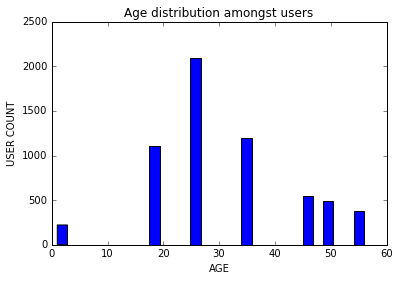

In [41]:
# visualize age distribution amongst users

%matplotlib inline
import matplotlib.pyplot as plt
#usersDF.head(1)

usersDF.Age.plot.hist(bins=30)
plt.title("Age distribution amongst users")
plt.ylabel('USER COUNT')
plt.xlabel('AGE')

# AGE AgeRange
# 1:  "Under 18"
# 18:  "18-24"
# 25:  "25-34"
# 35:  "35-44"
# 45:  "45-49"
# 50:  "50-55"
# 56:  "56+"

In [42]:
# compare ratings across age groups
movieLensMergedDF.groupby('AgeRange').agg({'Rating':[np.size, np.mean]})
# observation: seems that younger users are more critical when providing ratings as compared to older users

Rating          
            size      mean
AgeRange                  
18-24     183536  3.507573
25-34     395556  3.545235
35-44     199003  3.618162
45-49      83633  3.638062
50-55      72490  3.714512
56+        38780  3.766632
Under 18   27211  3.549520

In [43]:
# how is the most 20 rated movies rated amongst the different age groups
# use most_20_DF created earlier
# setting both dataframes to index on MovieID

# MovieID already the index in movieLensMergedDF
#print(movieLensMergedDF.head(1))

#movieLensMergedDF.set_index('MovieID', inplace=True)
AgeGroupRatings_DF = movieLensMergedDF.loc[most_20_DF.index].groupby(['Title', 'AgeRange'])
AgeGroupRatings_DF.Rating.mean().head(15)


Title                                   AgeRange
James and the Giant Peach (1996)        25-34       4.00
My Fair Lady (1964)                     18-24       4.00
                                        35-44       5.00
                                        45-49       4.00
One Flew Over the Cuckoo's Nest (1975)  25-34       4.20
                                        35-44       4.25
                                        45-49       4.50
                                        50-55       4.00
                                        56+         5.00
Name: Rating, dtype: float64

In [44]:
# above will produce a long list so pivot/unstack movie titles to rows and age range to columns
AgeGroupRatings_DF.Rating.mean().unstack(1).fillna(0)[10:20]

AgeRange,18-24,25-34,35-44,45-49,50-55,56+
Title,,,,,,


In [45]:
# interested to see the different ratings between men & women
movieLensMergedDF.reset_index('MovieID', inplace=True)
pivotDF = movieLensMergedDF.pivot_table(index=['MovieID','Title'],
                                     columns=['Gender'],
                                     values='Rating',
                                     fill_value=0)
pivotDF.head()

,Gender,F,M
MovieID,Title,,
1,Toy Story (1995),4.187817,4.130552
2,Jumanji (1995),3.278409,3.175238
3,Grumpier Old Men (1995),3.073529,2.994152
4,Waiting to Exhale (1995),2.976471,2.482353
5,Father of the Bride Part II (1995),3.212963,2.888298


In [46]:
# add difference column to pivotDF

pivotDF['Diff'] = pivotDF.M - pivotDF.F
pivotDF.head()

,Gender,F,M,Diff
MovieID,Title,,,
1,Toy Story (1995),4.187817,4.130552,-0.057265
2,Jumanji (1995),3.278409,3.175238,-0.103171
3,Grumpier Old Men (1995),3.073529,2.994152,-0.079377
4,Waiting to Exhale (1995),2.976471,2.482353,-0.494118
5,Father of the Bride Part II (1995),3.212963,2.888298,-0.324665


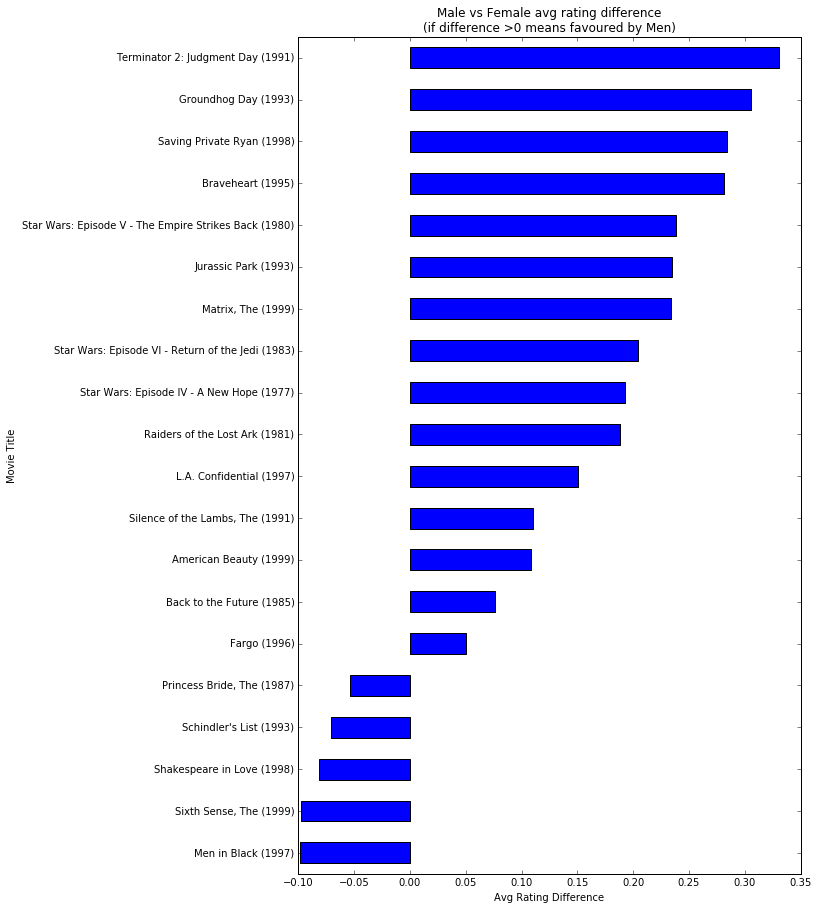

In [47]:
# plot the difference in ratings between male & female users

pivotDF.reset_index('MovieID', inplace=True)

differenceDF = pivotDF[pivotDF.MovieID.isin(most_20_DF.index)]['Diff']
differenceDF.sort_values().plot(kind='barh', figsize=[9,15])
plt.title('Male vs Female avg rating difference\n(if difference >0 means favoured by Men)')
plt.ylabel('Movie Title')
plt.xlabel('Avg Rating Difference')
#observation: as expected men prefer more action related movies as opposed to romantic movies.

# Prediction/Recommendation - Content & Collaborative Filtering

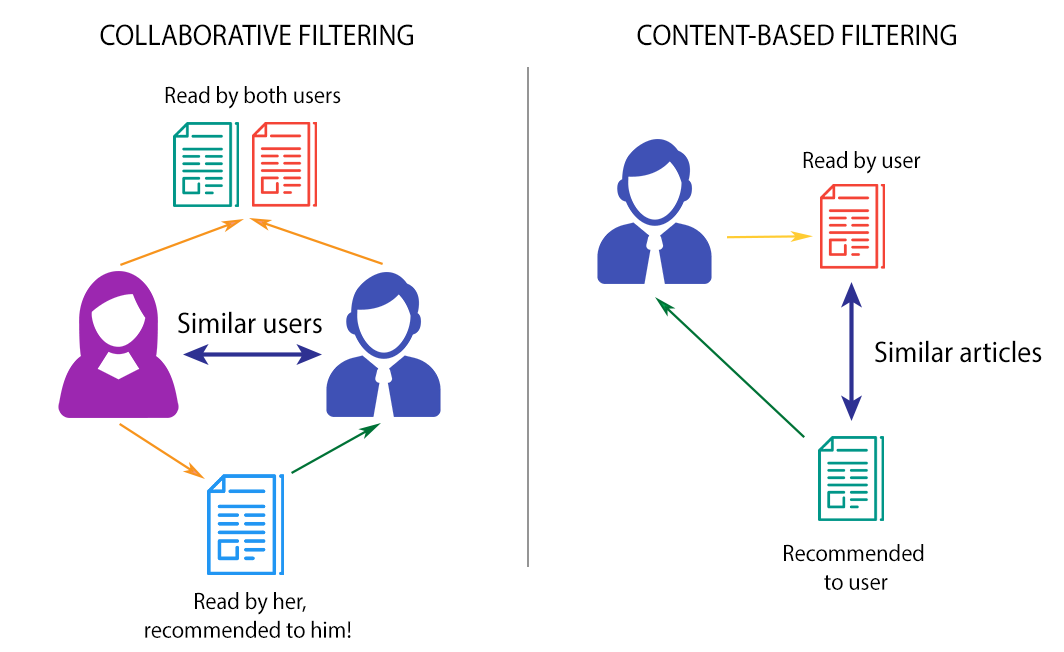

In [48]:
# ref: https://www.themarketingtechnologist.co/building-a-recommendation-engine-for-geek-setting-up-the-prerequisites-13/
# based on blogs

PATH = "C:\\datasets\\MovieLens_1mil\\"
#Image(filename = PATH + "collab_content_filtering.png")
Image(filename = PATH + "collab_content_filtering.png", width=700, height=700)



# Content Filtering

In [49]:
# items/movies will be mapped to a set of features/movie genres
# to recommend a user with an item that user has to provide their preferences based on movie genres
# will create a user with a strong preference for action, adventure and fiction movies

In [50]:
# get all movie genres into a DF
#moviesDF.head(1)
#moviesDF.columns[3:]
movieGenresDF = moviesDF.columns[3:]
movieGenresDF

Index([u'Action', u'Adventure', u'Animation', u'Children's', u'Comedy',
       u'Crime', u'Documentary', u'Drama', u'Fantasy', u'Film-Noir', u'Horror',
       u'Musical', u'Mystery', u'Romance', u'Sci-Fi', u'Thriller', u'War',
       u'Western'],
      dtype='object')

In [51]:
from collections import OrderedDict
# OrderedDict is a dict that remembers the order that keys were first inserted. 
# If a new entry overwrites an existing entry, the original insertion position is left unchanged. 
# Deleting an entry and reinserting it will move it to the end.
# zip() combines the names and the values. With a list comprehension.

# creating user with a strong preference for action, adventure and Fantasy movies

user_preferencesDF = OrderedDict(zip(movieGenresDF,[]))

user_preferencesDF['Action'] = 5  
user_preferencesDF['Adventure'] = 5  
user_preferencesDF['Animation'] = 1  
user_preferencesDF["Children's"] = 1  
user_preferencesDF["Comedy"] = 3  
user_preferencesDF['Crime'] = 2  
user_preferencesDF['Documentary'] = 1  
user_preferencesDF['Drama'] = 1  
user_preferencesDF['Fantasy'] = 5  
user_preferencesDF['Film-Noir'] = 1  
user_preferencesDF['Horror'] = 2  
user_preferencesDF['Musical'] = 1  
user_preferencesDF['Mystery'] = 3  
user_preferencesDF['Romance'] = 1  
user_preferencesDF['Sci-Fi'] = 5  
user_preferencesDF['War'] = 3  
user_preferencesDF['Thriller'] = 2  
user_preferencesDF['Western'] =1  



In [52]:
user_preferencesDF

OrderedDict([('Action', 5),
             ('Adventure', 5),
             ('Animation', 1),
             ("Children's", 1),
             ('Comedy', 3),
             ('Crime', 2),
             ('Documentary', 1),
             ('Drama', 1),
             ('Fantasy', 5),
             ('Film-Noir', 1),
             ('Horror', 2),
             ('Musical', 1),
             ('Mystery', 3),
             ('Romance', 1),
             ('Sci-Fi', 5),
             ('War', 3),
             ('Thriller', 2),
             ('Western', 1)])

In [53]:
# define function to get a score of a movie for a specific user
# use the dot product of the movie genre vector with the user preferences vector
# vectors are multiplied using the dot product
# vector1 = movie genre
# vector2 = user preferences
# https://stackoverflow.com/questions/5919530/what-is-the-pythonic-way-to-calculate-dot-product

def dot_product(vector_1, vector_2):
    return sum([i*j for i,j in zip(vector_1, vector_2)])

def get_movie_score(movie_features, user_preferencesDF):
    return dot_product(movie_features, user_preferencesDF)



In [54]:
# get movie score of Toy Story for the sample user 
# Toy Story genres are; Animation, Childrens & Comedy

#toy_story_features = moviesDF.loc[0]
toy_story_features = moviesDF.loc[0][movieGenresDF]
toy_story_features

Action         0
Adventure      0
Animation      1
Children's     1
Comedy         1
Crime          0
Documentary    0
Drama          0
Fantasy        0
Film-Noir      0
Horror         0
Musical        0
Mystery        0
Romance        0
Sci-Fi         0
Thriller       0
War            0
Western        0
Name: 0, dtype: object

In [55]:
toy_story_user_predicted_score = dot_product(toy_story_features, user_preferencesDF.values())
toy_story_user_predicted_score

5

In [56]:
# in order to understand the predicted score need to compare toy story to a more action packed movie like Die Hard
moviesDF[moviesDF.Title.str.contains('Die Hard')]


,MovieID,Title,Genres,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
163,165,Die Hard: With a Vengeance (1995),Action|Thriller,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1023,1036,Die Hard (1988),Action|Thriller,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1349,1370,Die Hard 2 (1990),Action|Thriller,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [57]:
die_hard_MovieID = 1036
die_hard_features = moviesDF[moviesDF.MovieID==die_hard_MovieID][movieGenresDF]
die_hard_features

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
1023,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [58]:
die_hard_features.values[0]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

In [59]:
user_preferencesDF.values()

[5, 5, 1, 1, 3, 2, 1, 1, 5, 1, 2, 1, 3, 1, 5, 3, 2, 1]

In [60]:
# user has a strong preference for action, adventure and Fantasy movies
# die hard has action & thriller genres
die_hard_user_predicted_score = dot_product(die_hard_features.values[0], user_preferencesDF.values())
die_hard_user_predicted_score

# 8 = Action + Thriller values in user_preferencesDF
# 8 = 5 + 3
# therefore Die Hard would be recommended before Toy Story

8

In [61]:
# evaluation of the predicted score is done
# now will provide movie recommendations to the sample user based on all movies with the highest scores

def get_movie_recommendations(user_preferencesDF, num_recommendations):
    # add a column to moviesDF with the score for each movie for a given user
    moviesDF['Score']=moviesDF[movieGenresDF].apply(get_movie_score,
                                                   args=([user_preferencesDF.values()]), axis=1)
    return moviesDF.sort_values(by=['Score'],ascending=False)['Title'][:num_recommendations]

get_movie_recommendations(user_preferencesDF, 10)

#observation: good recommendations are they are mainly action, fantasy or sci-fi movies

2253                                       Soldier (1998)
257             Star Wars: Episode IV - A New Hope (1977)
2036                                          Tron (1982)
1197                              Army of Darkness (1993)
2559     Star Wars: Episode I - The Phantom Menace (1999)
1985                      Honey, I Shrunk the Kids (1989)
1192    Star Wars: Episode VI - Return of the Jedi (1983)
1111                                    Abyss, The (1989)
1848                                    Armageddon (1998)
2847                                  Total Recall (1990)
Name: Title, dtype: object

# Content Filtering - Advantages / Disadvantages

### Advantages
Recommending to a new user is easy

Users have to express their preferences only once

User independence: collaborative filtering needs other users' rating to find the similarity between the users and then give the suggestion. Instead, content-based method only have to analyze the items and user profile for recommendation.

Transparency: collaborative method gives you the recommendation because some unknown users have the same tastes as you, but content-based method can recommend you the items based on your features. 

No cold start: opposite to collaborative filtering, new items can be suggested before being rated by a substantial number of users. 

### Disadvantages
Need to map each item/movie into the feature space; therefore any time a new item/movie gets added, someone has to manually categorize that item/movie.

When not enough information to build a solid user profile the recommendations may be weak. 

# Collaborative Filtering

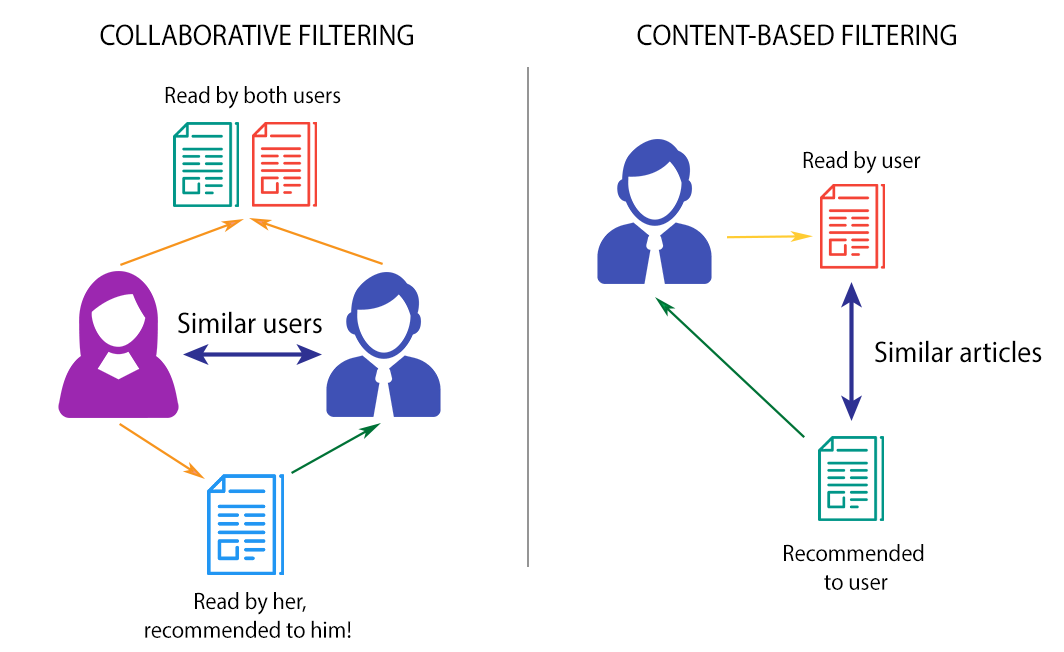

In [62]:
# ref: https://www.themarketingtechnologist.co/building-a-recommendation-engine-for-geek-setting-up-the-prerequisites-13/
# based on blogs

PATH = "C:\\datasets\\MovieLens_1mil\\"
#Image(filename = PATH + "collab_content_filtering.png")
Image(filename = PATH + "collab_content_filtering.png", width=700, height=700)

In [63]:
# users will get movie recommendations based on movies rated highly by other users with similar tastes

In [64]:
ratingsDF.head(1)

,UserID,MovieID,Rating,TimeStamp
0,1,1193,5,978300760


In [65]:
# pre-processing the ratingsDF
# remove TimeStamp column as not needed
del ratingsDF['TimeStamp']

In [66]:
ratingsDF.head(1)

,UserID,MovieID,Rating
0,1,1193,5


In [68]:
# Update ratingsDF adding Movie Title from moviesDF so results are easier to understand
ratingsDF = pd.merge(ratingsDF, moviesDF, on='MovieID')[['UserID','Title','MovieID','Rating']]
ratingsDF.head(1)

,UserID,Title,MovieID,Rating
0,1,One Flew Over the Cuckoo's Nest (1975),1193,5


In [70]:
#moviesDF.head(1)
moviesDF.loc[moviesDF['MovieID'] == 1193]

,MovieID,Title,Genres,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Score
1176,1193,One Flew Over the Cuckoo's Nest (1975),Drama,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [80]:
# the ratingsDF is now a matrix of users and movie ratings so will convert the ratingsDF to a matrix
# rows = unique users
# columns = unique movie
# values = a column or a list of columns to aggregate
# http://pandas.pydata.org/pandas-docs/stable/reshaping.html

ratingsDF_Matrix = ratingsDF.pivot_table(values='Rating',index='UserID', columns='Title')
ratingsDF_Matrix.fillna(0, inplace=True)

movie_index = ratingsDF_Matrix.columns

In [79]:
ratingsDF_Matrix.columns
# list of all movie titles as columns

Index([u'$1,000,000 Duck (1971)', u''Night Mother (1986)',
       u''Til There Was You (1997)', u''burbs, The (1989)',
       u'...And Justice for All (1979)', u'1-900 (1994)',
       u'10 Things I Hate About You (1999)', u'101 Dalmatians (1961)',
       u'101 Dalmatians (1996)', u'12 Angry Men (1957)',
       ...
       u'Young Poisoner's Handbook, The (1995)',
       u'Young Sherlock Holmes (1985)', u'Young and Innocent (1937)',
       u'Your Friends and Neighbors (1998)', u'Zachariah (1971)',
       u'Zed & Two Noughts, A (1985)', u'Zero Effect (1998)',
       u'Zero Kelvin (Kj�rlighetens kj�tere) (1995)',
       u'Zeus and Roxanne (1997)', u'eXistenZ (1999)'],
      dtype='object', name=u'Title', length=3706)

In [81]:
ratingsDF_Matrix.head(10)
# 6040 users/rows
# 3706 movies/columns

Title,"$1,000,000 Duck (1971)",'Night Mother (1986),'Til There Was You (1997),"'burbs, The (1989)",...And Justice for All (1979),1-900 (1994),10 Things I Hate About You (1999),101 Dalmatians (1961),101 Dalmatians (1996),12 Angry Men (1957),...,"Young Poisoner's Handbook, The (1995)",Young Sherlock Holmes (1985),Young and Innocent (1937),Your Friends and Neighbors (1998),Zachariah (1971),"Zed & Two Noughts, A (1985)",Zero Effect (1998),Zero Kelvin (Kj�rlighetens kj�tere) (1995),Zeus and Roxanne (1997),eXistenZ (1999)
UserID,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [82]:
# to get similarities between movies can find the correlation between movies and use that correlation to find similar
# movies to those the users have liked.
# Can use the numpy.corrcoef function which calculates the PCC (Pearson Correlation Coefficient)
# between each item pair.
# the PMCC has a value between -1 and 1 which measures the correlation (positive or negative) between two variables.

In [111]:
# correlation matrix
# using transpose to get the correlation between rows/movies - if not used will get the correlation of users

corr_Matrix = np.corrcoef(ratingsDF_Matrix.T)
corr_Matrix.shape

(3706L, 3706L)

In [112]:
corr_Matrix

array([[ 1.        ,  0.06533759,  0.03080517, ..., -0.00133208,
         0.11657371,  0.0092426 ],
       [ 0.06533759,  1.        ,  0.10737359, ..., -0.00185192,
        -0.00582469,  0.05469931],
       [ 0.03080517,  0.10737359,  1.        , ..., -0.00157109,
         0.04284183,  0.0434834 ],
       ..., 
       [-0.00133208, -0.00185192, -0.00157109, ...,  1.        ,
        -0.00102097,  0.0425339 ],
       [ 0.11657371, -0.00582469,  0.04284183, ..., -0.00102097,
         1.        ,  0.03148125],
       [ 0.0092426 ,  0.05469931,  0.0434834 , ...,  0.0425339 ,
         0.03148125,  1.        ]])

In [113]:
# to find similar movies to a specific movie called Movie_A, get movies with a high corrcoef with Movie_A

Movie_A_Title = 'Toy Story (1995)'

Movie_A_Index = list(movie_index).index(Movie_A_Title)

P = corr_Matrix[Movie_A_Index]

# only return movies with a high correlation to Toy Story
list(movie_index[(P>0.4) & (P<1.0)])

# observation: output looks good they are mainly animated movies similar to Toy Story.

['Aladdin (1992)',
 "Bug's Life, A (1998)",
 'Groundhog Day (1993)',
 'Lion King, The (1994)',
 'Toy Story (1995)',
 'Toy Story 2 (1999)']

In [117]:
# to provide movie recommendations to a user take the list of movies that user has already rated
# sum the correlations of those movies with all other movies 
# and return a list of those movies sorted by their total correlation with the user

def get_movie_similarity(Title):  
    #Returns correlation vector for a movie
    movie_idx = list(movie_index).index(Title)
    return corr_Matrix[movie_idx]

def get_movie_recommendations(user_movies):  
    #given a set of movies, it returns all the movies sorted by their correlation with the user
    movie_similarities = np.zeros(corr_Matrix.shape[0])
    for movie_id in user_movies:
        movie_similarities = movie_similarities + get_movie_similarity(movie_id)
    similarities_df = pd.DataFrame({
        'Title': movie_index,
        'sum_similarity': movie_similarities
        })
    similarities_df = similarities_df[~(similarities_df.Title.isin(user_movies))]
    similarities_df = similarities_df.sort_values(by=['sum_similarity'], ascending=False)
    return similarities_df


In [106]:
# exmaple user with a preference for kids and action movies
sample_user = 21  
ratingsDF[ratingsDF.UserID==sample_user].sort_values(by=['Rating'], ascending=False)  

,UserID,Title,MovieID,Rating
583304,21,Titan A.E. (2000),3745,5
707307,21,"Princess Mononoke, The (Mononoke Hime) (1997)",3000,5
70742,21,Star Wars: Episode VI - Return of the Jedi (1983),1210,5
239644,21,"South Park: Bigger, Longer and Uncut (1999)",2700,5
487530,21,Mad Max Beyond Thunderdome (1985),3704,4
707652,21,Little Nemo: Adventures in Slumberland (1992),2800,4
708015,21,Stop! Or My Mom Will Shoot (1992),3268,3
706889,21,"Brady Bunch Movie, The (1995)",585,3
623947,21,"Iron Giant, The (1999)",2761,3
619784,21,Wild Wild West (1999),2701,3


In [121]:
# provide movie recommendations to the sample user, using their list of rated movies as input

sample_user_movies = ratingsDF[ratingsDF.UserID==sample_user].Title.tolist()  
recommendations = get_movie_recommendations(sample_user_movies)

#top 10 recommended movies
recommendations.Title.head(20)  

#observation: sample user based on history likes kids and action movies and below satifies this.

1939                     Lion King, The (1994)
324                Beauty and the Beast (1991)
1948                Little Mermaid, The (1989)
3055    Snow White and the Seven Dwarfs (1937)
647                     Charlotte's Web (1973)
679                          Cinderella (1950)
1002                              Dumbo (1941)
301                              Batman (1989)
3250            Sword in the Stone, The (1963)
303                      Batman Returns (1992)
2252                              Mulan (1998)
2924                Secret of NIMH, The (1982)
2808                         Robin Hood (1973)
3026                    Sleeping Beauty (1959)
1781                   Jungle Book, The (1967)
260         Back to the Future Part III (1990)
259          Back to the Future Part II (1989)
2558                          Peter Pan (1953)
2347             NeverEnding Story, The (1984)
97                  Alice in Wonderland (1951)
Name: Title, dtype: object

# Collaborative Filtering - Advantages / Disadvantages

### Advantages
recommending new items without having to define them



### Disadvantages
cold start problem - issue in recommending to new users or recommending new items/movies.
Can not recommend items for new users until they have rated some movies. 
Can not recommend new items until they have been rated. 


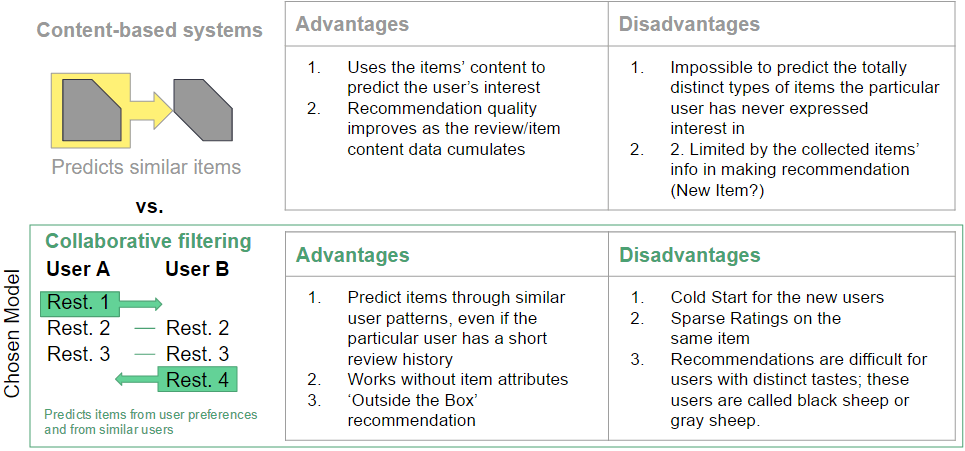

In [123]:
# ref: https://amy17519.wordpress.com/2016/10/04/yelp/
# based on Yelp

PATH = "C:\\datasets\\MovieLens_1mil\\"
Image(filename = PATH + "collab_filt.png")
#Image(filename = PATH + "collab_filt.png", width=700, height=700)

# Conclusion

Based on completing this project I have found that both models work ok. 
Content and Colloborative Filtering recommendation systems both have their advanatages and disadvantages, therefore its best to use a combination of the two. 

However when it comes to businesses like Netflix with paid subscribers they would gather users feedback and constantly improve their models. Risks are much higher for companies with paid subscribers as compared to youTube.  

Another metric to obtain is that when a list of movies have been recommended to a user, how many times do they click on a movie in that recommended list. Over time it will be possible to segment the users based on those who like the recommendations and those who dont.

Even though recommendations are getting quite advanced because they have more input data to train on. They can't predict a human's mood, mood is one attribute that is relied on when choosing a movie. If you want to relax you may want to watch a comedy movie. But the recommendation system will look at your previous historical views and recommend something based on that. If you have been watching action movies for the past 3 months then you are likely to be recommended and action movie even though the mood that you are in you would prefer to watch a comedy movie. 

Before computer-based recommendation systems your friends may recommend you watch a movie, which is an example of collaborative based recommendation. You probably have similar interests in movies so you will probably like the movie they recommend. You also have the option to go to a ratings site such as rotten tomatoes and read reviews, watch the trailers and do other research to see if a specific movie interests you. 

So once a recommendation system recommends you a list of movies I would still do my own research on those movies to narrow down from say a list of 10 movies to the top 3.
